# Example 001: Radar fixed target

In [1]:
import os
parent = os.path.dirname(os.getcwd())
os.chdir(parent)
parent

'c:\\Users\\rasmu\\Documents\\GitHub\\MMARS'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mmars

## Setting up the radar

Maximum unambiguous range: 99.93 m
Maximum unambiguous IF frequency: 20.00 MHz
Maximum unambiguous velocity: 37.93 m/s
Maximum unambiguous angle: 90.00 degrees
SNR: 200 dB at 50 m


C:\Users\rasmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\rasmu\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


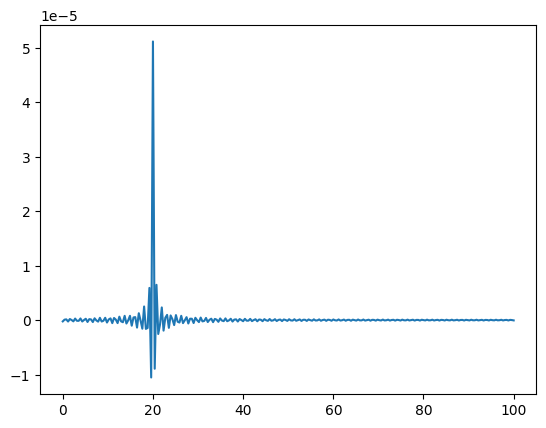

In [3]:
radar_model_1 = mmars.FmcwRadar(position=np.array([[0,0]]),N_chirps=1,signalNoiseRatio=[200,50])
radar_model_1.show_parameters()
radar_model_1.radar_to_target_measures()
radar_model_1.generate_S_signal(target_x=20,target_y=0)
plt.plot(np.linspace(0,100,256),radar_model_1.get_S_signal()[0,0,0,:])

## Setting up the target

In [4]:
target_model_1 = mmars.Target(start_position=np.array([[10,10]]), start_velocity=5.)
target_model_1.generate_trajectory(trajectory_type="sinusoidal")
target_model_1.get_trajectory()

(array([1.00000000e+01, 1.01999867e+01, 1.03998933e+01, 1.05996401e+01,
        1.07991469e+01, 1.09983342e+01, 1.11971221e+01, 1.13954311e+01,
        1.15931821e+01, 1.17902957e+01, 1.19866933e+01, 1.21822962e+01,
        1.23770263e+01, 1.25708055e+01, 1.27635565e+01, 1.29552021e+01,
        1.31456656e+01, 1.33348709e+01, 1.35227423e+01, 1.37092047e+01,
        1.38941834e+01, 1.40776045e+01, 1.42593947e+01, 1.44394811e+01,
        1.46177918e+01, 1.47942554e+01, 1.49688014e+01, 1.51413599e+01,
        1.53118620e+01, 1.54802394e+01, 1.56464247e+01, 1.58103516e+01,
        1.59719544e+01, 1.61311685e+01, 1.62879302e+01, 1.64421769e+01,
        1.65938467e+01, 1.67428791e+01, 1.68892145e+01, 1.70327942e+01,
        1.71735609e+01, 1.73114583e+01, 1.74464312e+01, 1.75784256e+01,
        1.77073888e+01, 1.78332691e+01, 1.79560162e+01, 1.80755810e+01,
        1.81919157e+01, 1.83049737e+01, 1.84147098e+01, 1.85210802e+01,
        1.86240423e+01, 1.87235548e+01, 1.88195781e+01, 1.891207

In [5]:
sim = mmars.Simulation(radar_model_1, target_model_1)
sim.run()
sim.run_tracking(tracking_algorithm="mrblat")

Running simulation with <mmars.fmcwRadar.FmcwRadar object at 0x000001F713785910> and <mmars.target.Target object at 0x000001F71331BE90>


100%|██████████| 500/500 [00:00<00:00, 1100.16it/s]


[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 ...
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


100%|██████████| 500/500 [00:00<00:00, 40719.82it/s]
